In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Generate test signals with varying frequency and noise

In [2]:
# definition of paramaters
fmax = 60
wmax = 2*np.pi*fmax
Ts = 0.001
num_of_data_points = 1000
time_max = num_of_data_points*Ts
print(time_max)

1.0


In [3]:
from scipy.signal import butter, lfilter, freqz
# Design a Butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the filter to the data
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

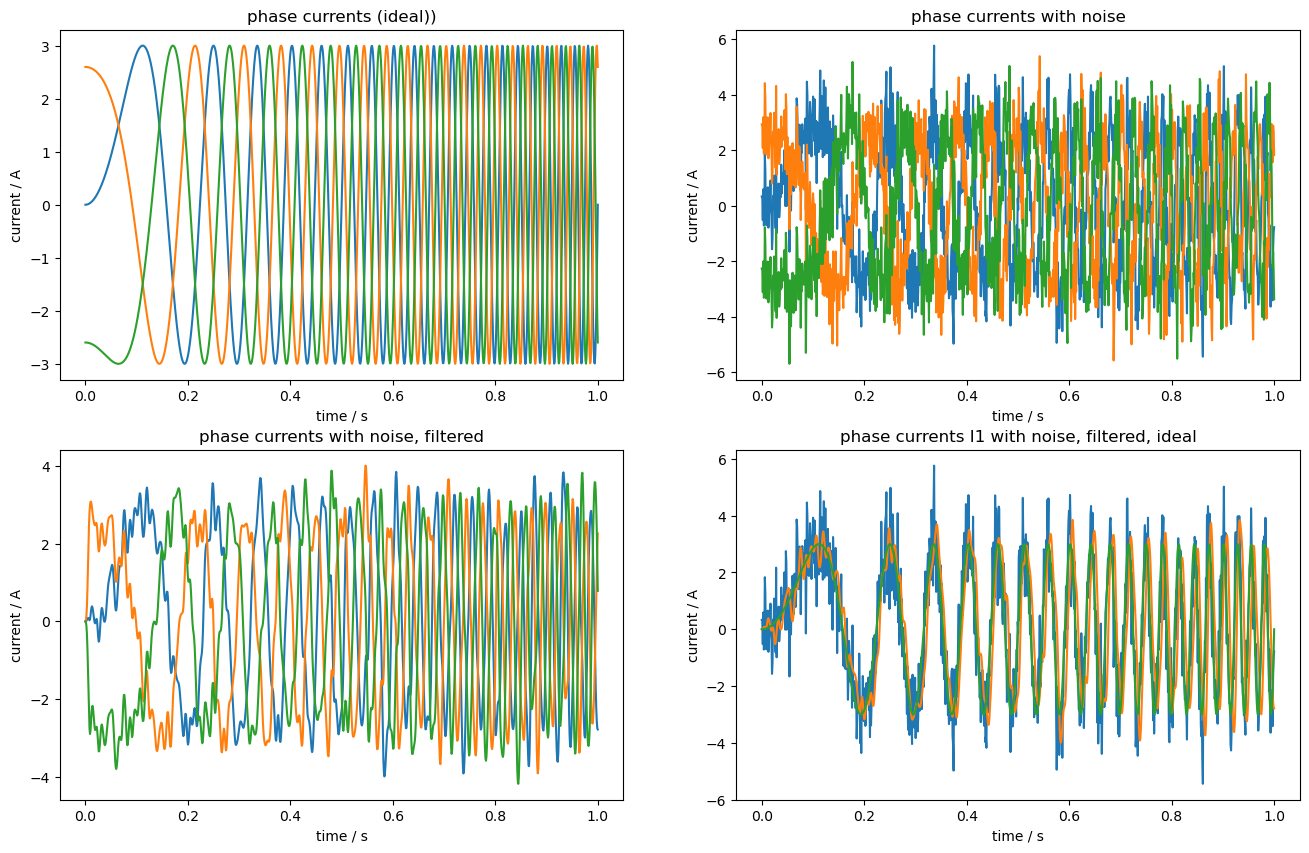

In [18]:
# varying frequency
Tsmech = 3
phi0 = 0
phi_off = np.array([0, 2*np.pi/3, 2*2*np.pi/3]) + phi0
dw =wmax/Tsmech
time = np.linspace(0, time_max, num_of_data_points)
w_vari = dw*time
w_vari[w_vari>wmax] = wmax
I_amplitude = 3
# Generate Gaussian noise
noise_amplitude = 1  # Adjust the amplitude of noise as needed
noise = noise_amplitude * np.random.normal(0, 1, len(w_vari))

I1 = I_amplitude*np.sin(w_vari*time + phi_off[0])
I2 = I_amplitude*np.sin(w_vari*time + phi_off[1])
I3 = I_amplitude*np.sin(w_vari*time + phi_off[2])

plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.plot(time, I1)
plt.plot(time, I2)
plt.plot(time, I3)
plt.title("phase currents (ideal))")
plt.xlabel("time / s")
plt.ylabel("current / A")
#plt.show()

plt.subplot(2,2,2)
plt.plot(time, I1+noise, label="phase current 1")
plt.plot(time, I2+noise, label="phase current 2")
plt.plot(time, I3+noise, label="phase current 3")
plt.title("phase currents with noise")
plt.xlabel("time / s")
plt.ylabel("current / A")
#plt.show()

plt.subplot(2,2,3)
plt.plot(time, lowpass_filter(I1+noise, 100, 1000),  label="phase current 1")
plt.plot(time, lowpass_filter(I2+noise, 100, 1000), label="phase current 2")
plt.plot(time, lowpass_filter(I3+noise, 100, 1000), label="phase current 3")
plt.title("phase currents with noise, filtered")
plt.xlabel("time / s")
plt.ylabel("current / A")

#plt.show()
plt.subplot(2,2,4)
plt.plot(time, I1+noise, label="phase current 1 with noise")
plt.plot(time, lowpass_filter(I1+noise, 100, 1000), label="phase current 1 with noise, filtered")
plt.plot(time, I1,  label="phase current 1, ideal")
plt.xlabel("time / s")
plt.ylabel("current / A")
plt.title("phase currents I1 with noise, filtered, ideal")

plt.show()
